In [13]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x_data=torch.Tensor([[1.0],[2.0],[3.0]])
y_data=torch.Tensor([[0],[0],[1]])

In [4]:
class LogisticModel(torch.nn.Module):
    def __init__(self):
        super(LogisticModel,self).__init__()
        self.linear=torch.nn.Linear(1,1)
        
    def forward(self,x):
        y_=torch.nn.functional.sigmoid(self.linear(x))
        return y_

In [5]:
model=LogisticModel()

In [7]:
criterion=torch.nn.BCELoss(size_average=False)
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.01)

In [45]:
loss_list=[]
for epoch in range(10000):
    y_=model(x_data)
    loss=criterion(y_,y_data)
    if epoch%100==0:
        print(epoch,loss.item())
    loss_list.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

c:\users\root\appdata\local\programs\python\python37\lib\site-packages\torch\nn\functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0 0.013920536264777184
100 0.013913994655013084
200 0.013907572254538536
300 0.013901149854063988
400 0.013894728384912014
500 0.013888366520404816
600 0.013881944119930267
700 0.013875521719455719
800 0.013869218528270721
900 0.013862738385796547
1000 0.013856494799256325
1100 0.013850013725459576
1200 0.013843651860952377
1300 0.013837229460477829
1400 0.01383086759597063
1500 0.013824505731463432
1600 0.013818023726344109
1700 0.01381172239780426
1800 0.013805359601974487
1900 0.013798997737467289
2000 0.013792695477604866
2100 0.013786214403808117
2200 0.013779973611235619
2300 0.013773669488728046
2400 0.013767425902187824
2500 0.013761121779680252
2600 0.013754819519817829
2700 0.013748636469244957
2800 0.01374233327805996
2900 0.013736030086874962
3000 0.013729847967624664
3100 0.013723544776439667
3200 0.01371736079454422
3300 0.013711057603359222
3400 0.01370487455278635
3500 0.013698572292923927
3600 0.013692389242351055
3700 0.013686086051166058
3800 0.01367984339594841
3900

In [46]:
y_test=model(torch.Tensor([[4]]))
display(y_test.data.item())
np.sign(y_test.data.item())

0.9999997615814209

1.0

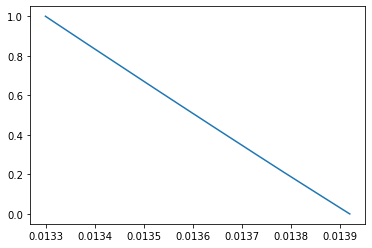

In [47]:
cl=np.linspace(0,1,num=len(loss_list))
plt.plot(loss_list,cl)